# Evaluation de plusieurs modèles de Machine Learning & Deep Learning.

Environ un adulte sur sept souffre actuellement de diabète, selon le **Center for Disease Control and Prevention**. Mais d’ici 2050, ce taux pourrait monter en flèche jusqu’à un sur trois. Dans cet esprit, voici ce que nous allons faire aujourd’hui: apprendre à utiliser l’apprentissage automatique ainsi que l’apprentissage profond pour nous aider à prédire le diabète.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier 
import pickle

## Partie 1: Machine Learning

### 1- Importation et lecture des donnees 

In [29]:
d=pd.read_csv(r'C:\Users\user\Downloads\ProjetAI\diabetes - Copie.csv',encoding='latin-1',delimiter=",")

**Nb:** Il est conseillé d'effectuer une copie du dataset afin de ne pas modifier le dataset d'origine. 

### 2-Visualisation et analyse du data set

#### les differentes colonnes de notre dataset:

Les ensembles de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. Les variables prédictives incluent le nombre de grossesses que la patiente a eues, son IMC, son taux d'insuline, son âge, etc.



In [30]:
d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### visualisation de l'ensemble de donnees: 

In [31]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
print("dimension of diabetes data: {}".format(d.shape))

dimension of diabetes data: (768, 9)


L’ensemble de données sur le diabète se compose de 768 points de données, avec 9 caractéristiques chacun

In [9]:
print(d.groupby('Outcome').size())

Outcome
0.0    500
1.0    268
dtype: int64


**Résultat/Outcome** est la caractéristique que nous allons prédire, 0 signifie Pas de diabète, 1 signifie diabète. Sur ces 768 points de données, 500 sont étiquetés comme 0 et 268 comme 1.

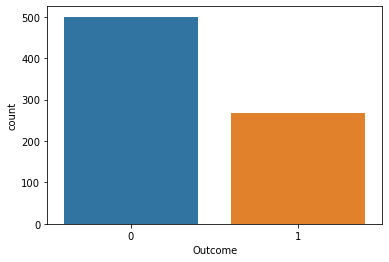

In [7]:
import seaborn as sns
sns.countplot(d['Outcome'],label="Count")

Nous avons fait un modèle pour 
prédire le diabète, mais l’ensemble de données était légèrement déséquilibré avec environ 500 classes étiquetées comme 0 signifie négatif signifie pas de diabète et 268 étiquetées comme 1 signifie positif 
signifie diabétique.

### 3- Preparation de donnees

#### nettoyage des donnees:

In [22]:
#check Valeurs Manquantes
d.isnull().values.any()

False

Il n’y a pas de valeurs manquantes dans le jeu de données. L’ensemble de données avait déjà été nettoyé.

#### Tracer les relations dans le jeu de données.

Il existe différentes façons d’afficher les relations à l’aide d’un jeu de données.J'utiliserai ici pour trouver des relations dans le jeu de données:**pairplot**

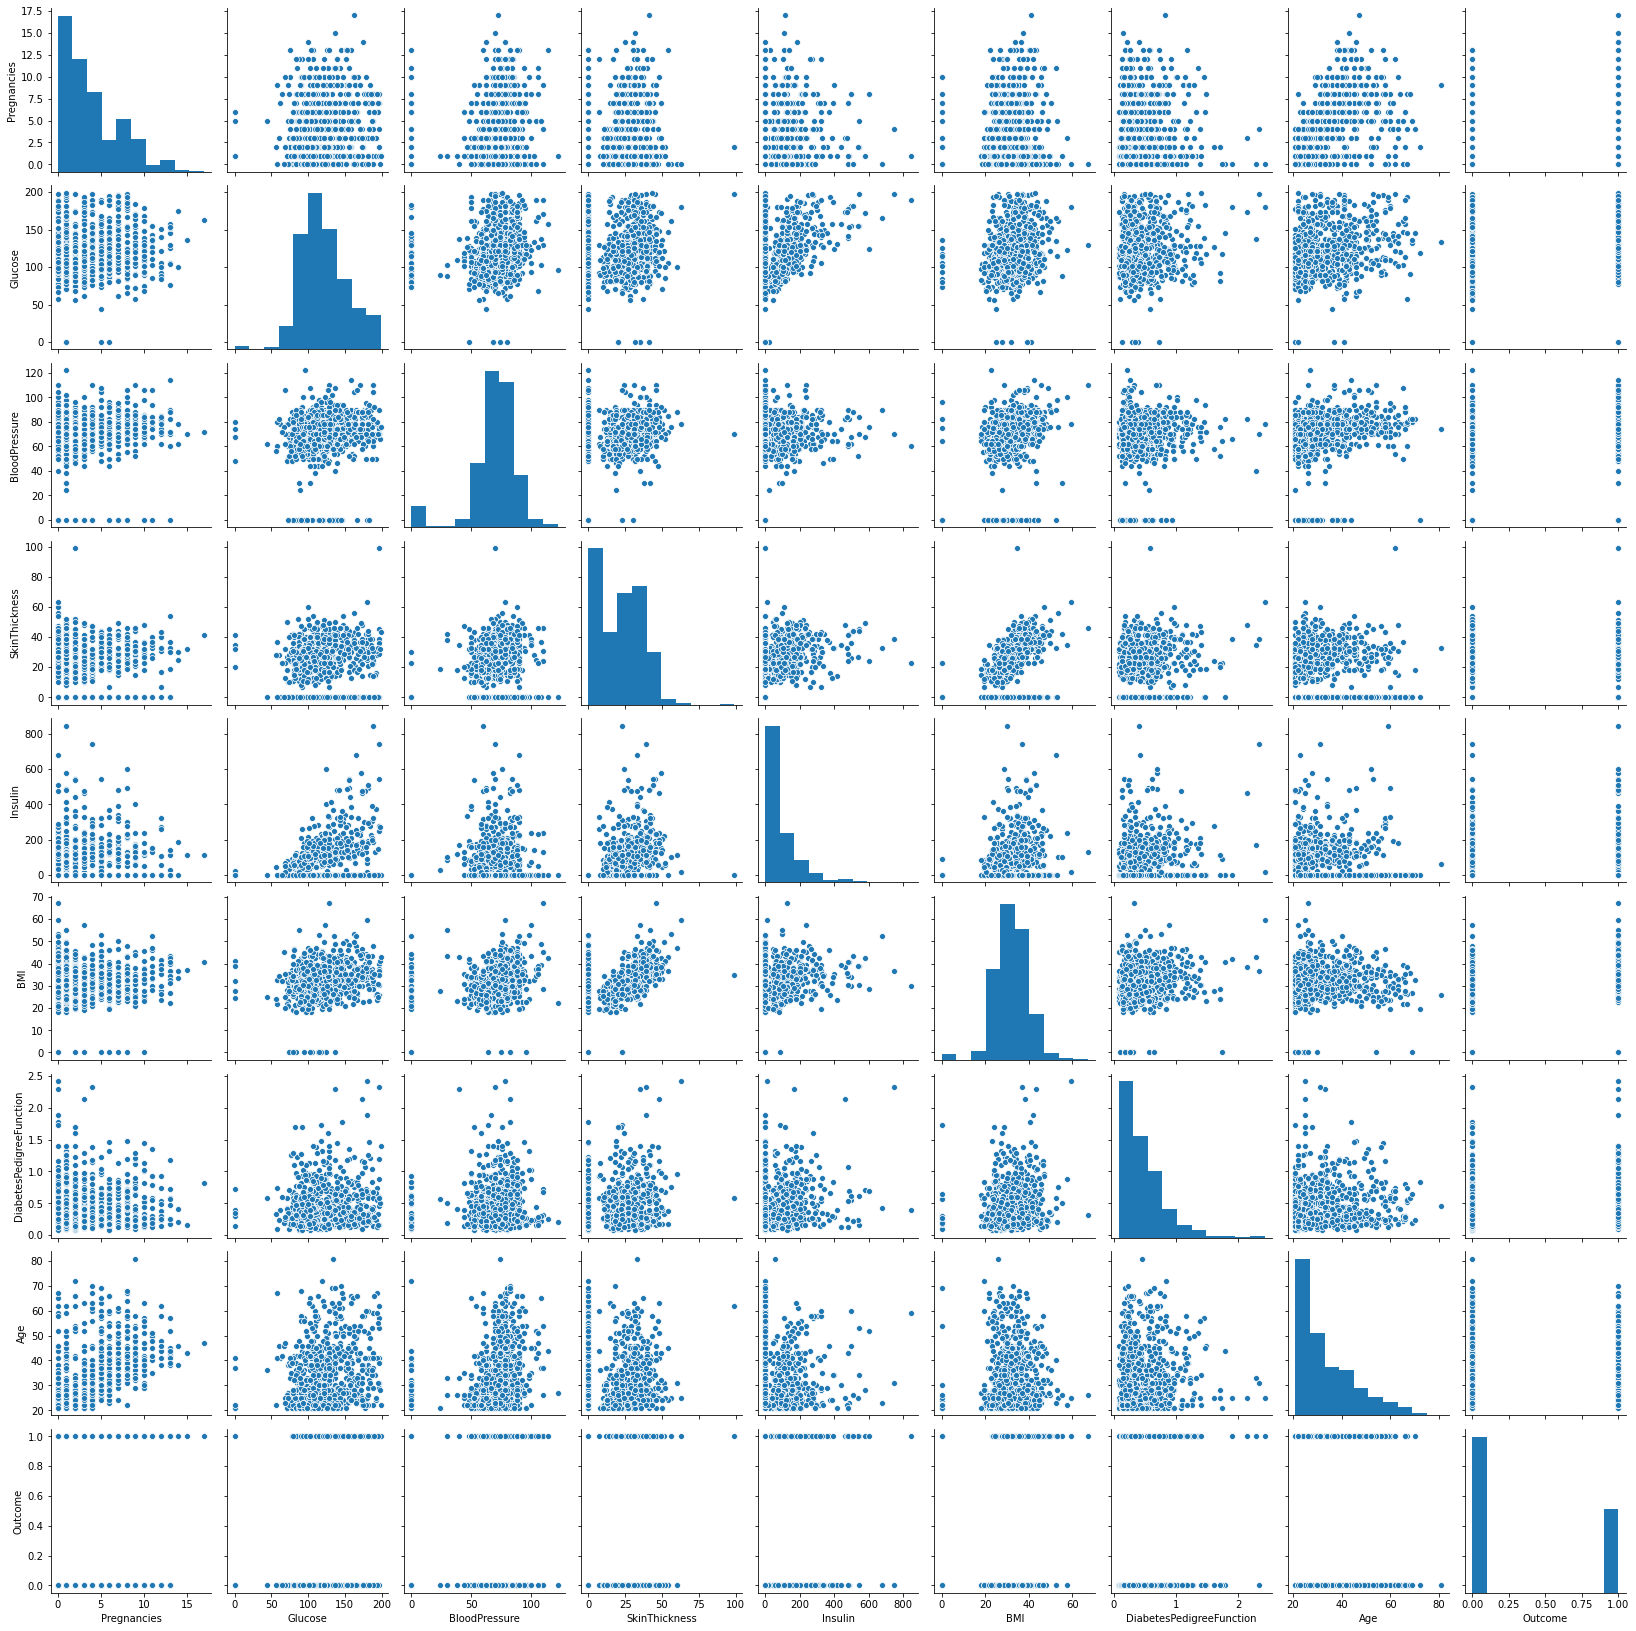

In [23]:
import seaborn as sns
sns.pairplot(d)

nous pouvons arriver à diverses conclusions en regardant ces graphiques par exemple si vous observez le 5ème graphique dans les grossesses avec de l’insuline, vous pouvez conclure que les femmes ayant un nombre plus élevé de grossesses ont une insuline plus faible

Ensuite, nous allons procéder à la vérification des relations en visualisant les corrélations comme indiqué dans le tableau ci-dessous.

In [25]:
#check correlations
d.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Le tableau affiche des corrélations spécifiques pour différentes variables du jeu de données sous forme de probabilité.

Nous pouvons tracer les corrélations à l’aide d’un comme indiqué ci-dessous.**heatmap**

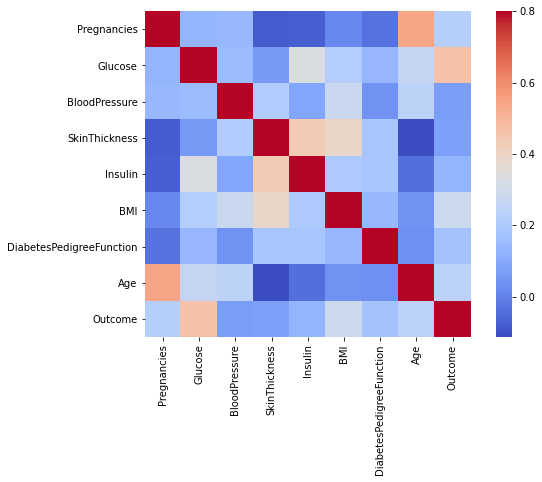

In [26]:
matrix = d.corr()
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix, vmax=.8, square=True,cmap="coolwarm")

#### Formation des données

Maintenant je vais diviser notre ensemble de données avant de l’entraîner. X contiendra toutes les variables indépendantes tandis que y aura la variable dépendante ()**Outcome**

In [10]:
#extraction de notre variable cible, le résultat
y= d['Outcome'].values
y.shape



(768,)

In [11]:
#extraction de notre x les variables prédictives 
x= d[d.columns[:-1]].values
x.shape

(768, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F64213D00>,
      dtype=object)

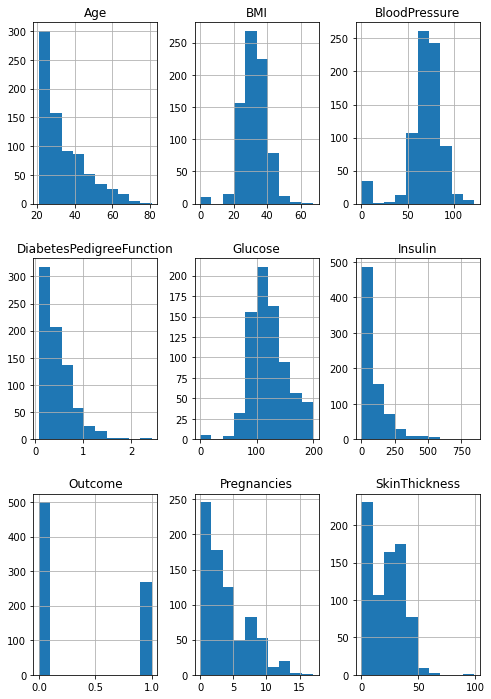

In [29]:
d.hist(figsize=(8,12))

**Conclusion:**Nous observons que seuls le glucose et la pression artérielle sont normalement distribués repos d’autres sont biaisés et ont des valeurs aberrantes

#### Vérification des colonnes et leurs types de données.

In [30]:
#visualisation du type des donnees
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


   À partir du jeu de données, 7 colonnes ont un type de données et 2 colonnes ont un type de données.int64float64

In [12]:
#notre perceptron ne recoit que des valeurs relles , donc je convertis celles qui sont en int en float
d["Outcome"]= d["Outcome"].astype(float)
d["Age"]= d["Age"].astype(float)
d["Insulin"]= d["Insulin"].astype(float)
d["SkinThickness"]= d["SkinThickness"].astype(float) 
d["Glucose"]= d["Glucose"].astype(float)
d["Pregnancies"]= d["Pregnancies"].astype(float)
d["BloodPressure"]= d["BloodPressure"].astype(float)

Après avoir divisé avec succès le jeu de données, je forme le à l’aide de **train_test_split**

### 4-split des donnees

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 300,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(468, 8) (300, 8) (468,) (300,)


### 5- Construction du modèle

j'utiliserai 6 modèles, à savoir **Random Forests**, **Decision Trees**, **SVM (Support Vector Machine)**, **KNN**... pour obtenir le meilleur score de précision. 
La métrique de **précision** est utilisée pour évaluer les modèles. Il s’agit du rapport entre le nombre d’instances correctement prédites dans un jeu de données divisé par le nombre total d’instances dans le jeu de données.Je vais continuer à explorer d’autres mesures pour déterminer le meilleur modèle.

## DTC

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.677


La précision sur l’ensemble d’entraînement est de 100%, tandis que la précision de l’ensemble de test est bien pire. Cela indique que l’arbre est surajustable et ne généralise pas bien aux nouvelles données. Par conséquent, nous devons appliquer la pré-élagage à l’arbre.

Nous définissons max_depth = 3, limiter la profondeur de l’arbre diminue le surajustement. Cela conduit à une précision inférieure sur l’ensemble d’entraînement, mais à une amélioration de l’ensemble de test.

In [34]:
# Create Decision Tree classifer object
DTC = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
DTC = DTC.fit(x_train,y_train)



In [35]:
print("Feature importances:\n{}".format(DTC.feature_importances_))

Feature importances:
[0.         0.44425155 0.         0.         0.02753903 0.32284446
 0.         0.20536496]


L’importance des fonctionnalités évalue l’importance de chaque fonctionnalité pour la décision prise par un arbre. C’est un nombre compris entre 0 et 1 pour chaque caractéristique, où 0 signifie « pas utilisé du tout » et 1 signifie « prédit parfaitement la cible ». Les importances des caractéristiques se résument toujours à 1 :

Ensuite, nous pouvons visualiser les importances des fonctionnalités:



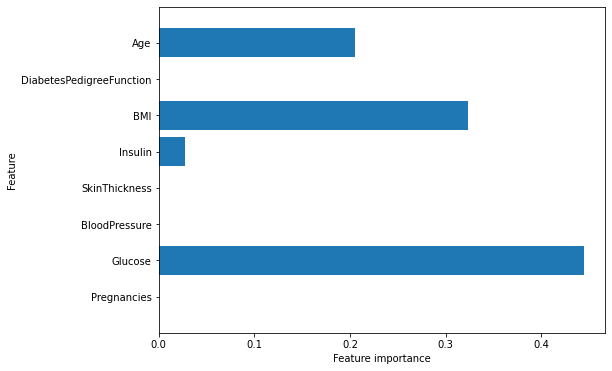

In [36]:
diabetes_features = [x for i,x in enumerate(d.columns) if i!=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(DTC)
plt.savefig('feature_importance')


Je vais me concentrer sur l’optimisation des performances des modèles pour nos projets. Cependant, il est important de comprendre comment les caractéristiques (variables) de notre modèle contribuent à la prédiction. Nous examinerons ensuite les caractéristiques les plus importantes pour la prédiction du diabète.

### RF (Random Forest)

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(n_estimators=200)

rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(n_estimators=200)

Voici le score de précision:

In [38]:
rf_predict = rf_model.predict(x_test)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_predict)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.7700


**Random Forest** donne une accuracy_score de **0,7667**

Matrice de confusion:

In [39]:
y_pred_RF = rf_model.predict(x_test)
#Evaluation using Classification report
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       201
         1.0       0.71      0.52      0.60        99

    accuracy                           0.77       300
   macro avg       0.75      0.71      0.72       300
weighted avg       0.76      0.77      0.76       300



### la régression logistique

In [40]:
#création d'une instance de la classe
lr = LogisticRegression(solver="liblinear")
#modélisation sur les données d'apprentissage
lr.fit(x_train,y_train)
#calcul des probas d'affectation sur ech. test
probas = lr.predict_proba(x_test)


La valeur par défaut C=1 fournit une précision de 78 % sur l’entraînement et de 77 % sur l’ensemble de tests.

## Regression Ridge

In [41]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol =0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

### SVM :

In [14]:
svm_model=svm.SVC(kernel='rbf', gamma=0.01,probability=True)
svm_model.fit(x_train,y_train)

SVC(gamma=0.01, probability=True)

### knn:

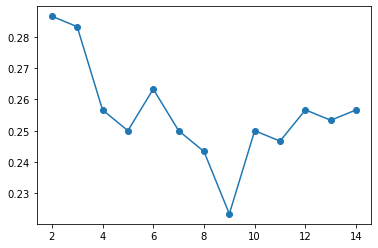

In [15]:
#trouver le bon k :
errors=[]
for k in range(2,15):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append((1-knn.fit(x_train,y_train).score(x_test,y_test)))
plt.plot(range(2,15),errors,'o-')
plt.show()

Le graphique ci-dessus montre la précision de l’entraînement et du jeu de tests sur l’axe des y par rapport au réglage de n_neighbors sur l’axe des x. Considérant que si nous choisissons un seul voisin le plus proche, la prédiction sur le plateau d’entraînement est parfaite. Mais lorsque plus de voisins sont considérés, la précision de l’entraînement diminue, ce qui indique que l’utilisation du voisin le plus proche conduit à un modèle trop complexe. La meilleure performance est quelque part autour de 9 voisins.

L’intrigue suggère que nous devrions choisir n_neighbors = 9. Et voilà:

In [16]:
knn=neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

La caractéristique  **Glucose** est de loin la caractéristique la plus importante.

### Random Forest

Appliquons une forêt aléatoire composée de 200 arbres sur l’ensemble de données sur le diabète:

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

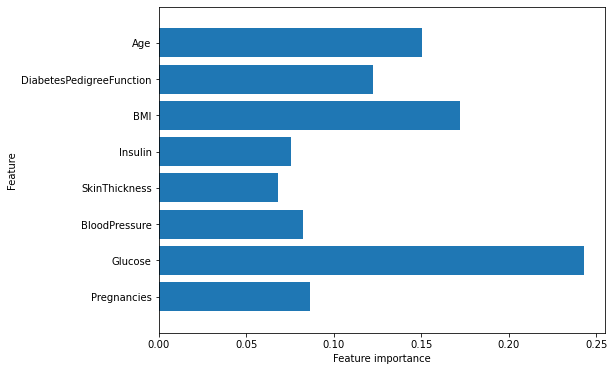

In [46]:
plot_feature_importances_diabetes(rfc)

À l’instar de l’arbre de décision unique, la forêt aléatoire accorde également beaucoup d’importance à la fonction **Glucose**, mais elle choisit également **IMC** pour être la 2ème fonctionnalité la plus informative dans l’ensemble. Le caractère aléatoire dans la construction de la forêt aléatoire oblige l’algorithme à envisager de nombreuses explications possibles, le résultat étant que la forêt aléatoire capture une image beaucoup plus large des données qu’un seul arbre.

Je vais me concentrer sur l’optimisation des performances des modèles pour nos projets. Cependant, il est important de comprendre comment les caractéristiques (variables) de notre modèle contribuent à la prédiction. Nous examinerons ensuite les caractéristiques les plus importantes pour la prédiction du diabète.

### Cross-validation 

#### pour la regression logistique

In [18]:
from sklearn import model_selection
#évaluation en validation croisée : 10 cross-validation
succes = model_selection.cross_val_score(lr,x,y,cv=10,scoring='accuracy')
#détail des itérations
print(succes)
#moyenne des taux de succès = estimation du taux de succès en CV
print(succes.mean()) 

NameError: name 'lr' is not defined

#### pour le knn:

In [19]:

from sklearn import model_selection
#évaluation en validation croisée : 10 cross-validation
succes = model_selection.cross_val_score(knn,x,y,cv=10,scoring='accuracy')
#détail des itérations
print(succes)
#moyenne des taux de succès = estimation du taux de succès en CV
print(succes.mean()) 

[0.67532468 0.75324675 0.74025974 0.67532468 0.7012987  0.80519481
 0.72727273 0.77922078 0.77631579 0.75      ]
0.7383458646616542


#### pour le svm

In [20]:
#évaluation en validation croisée : 10 cross-validation
succes = model_selection.cross_val_score(svm_model,x,y,cv=10,scoring='accuracy')
#détail des itérations
print(succes)
#moyenne des taux de succès = estimation du taux de succès en CV
print(succes.mean()) 

[0.61038961 0.67532468 0.61038961 0.67532468 0.67532468 0.7012987
 0.68831169 0.62337662 0.65789474 0.64473684]
0.6562371838687627


#### pour le DTC

In [50]:
#évaluation en validation croisée : 10 cross-validation
succes = model_selection.cross_val_score(DTC,x,y,cv=10,scoring='accuracy')
#détail des itérations
print(succes)
#moyenne des taux de succès = estimation du taux de succès en CV
print(succes.mean()) 

[0.72727273 0.72727273 0.72727273 0.67532468 0.71428571 0.79220779
 0.75324675 0.80519481 0.71052632 0.75      ]
0.7382604237867396


### 5-5-	Mesures de performances par confrontation entre Y et Y^ : matrice de confusion + mesures

##### pour la regression logistique:

In [52]:
y_pred_lr = lr.predict(x_test)
#Faire des prédictions finales et évaluer les performances
print( "Accuracy on Test:", metrics.accuracy_score(y_test,y_pred_lr),
      "\nRecall on Test:", metrics.recall_score(y_test, y_pred_lr),
     "\nF1 Score on Test:", metrics.f1_score(y_test, y_pred_lr))

Accuracy on Test: 0.7933333333333333 
Recall on Test: 0.5454545454545454 
F1 Score on Test: 0.6352941176470589


**RL**donne une accuracy_score de **0,7933**

In [53]:
#taux d'erreur
err_lr = 1.0 - metrics.accuracy_score(y_test,y_pred_lr)
print(err_lr)

0.20666666666666667


In [54]:
metrics.accuracy_score(y_test,y_pred_lr)

0.7933333333333333

##### matrice de confusion

In [55]:

#pour la reg logistique
rl_conf=confusion_matrix(y_test, y_pred_lr, labels=[1, 0])
pd.DataFrame(rl_conf)

,0,1
0,54,45
1,17,184


In [56]:
cm_lr = metrics.confusion_matrix(y_test,y_pred_lr)
print(cm_lr)

[[184  17]
 [ 45  54]]


In [57]:
y_pred_lr = lr.predict(x_test)
#Evaluation using Classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       201
         1.0       0.76      0.55      0.64        99

    accuracy                           0.79       300
   macro avg       0.78      0.73      0.75       300
weighted avg       0.79      0.79      0.78       300



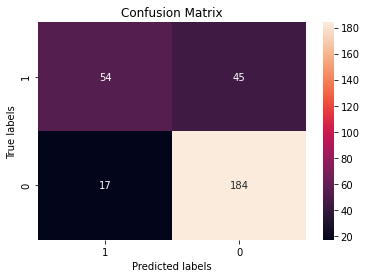

In [58]:
ax= plt.subplot()
sns.heatmap(rl_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


In [59]:
#pour le lr
compare_df_lr = pd.DataFrame({'actual': y_test, 'predicted': y_pred_lr})
compare_df_lr = compare_df_lr.reset_index(drop = True)
compare_df_lr

,actual,predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
295,1.0,1.0
296,1.0,1.0
297,0.0,0.0
298,0.0,0.0


### regression de Ridge

In [60]:
from sklearn.model_selection import cross_val_score
# The data automatically devided by 5 folder
scores = cross_val_score(lr, x, y, cv=5, scoring='accuracy')
print(scores)

#Avg for the five scores to get more accuracy score
print(scores.mean())

[0.76623377 0.75324675 0.75324675 0.80392157 0.76470588]
0.768270944741533


In [61]:
y_pred_ridge = ridge_reg.predict(x_test)

In [62]:
#Faire des prédictions finales et évaluer les performances
#print( "Accuracy on Test:", accuracy_score(y_test,y_pred_ridge),
      #"\nRecall on Test:", recall_score(y_test, y_pred_ridge),
     #"\nF1 Score on Test:", f1_score(y_test, y_pred_ridge))

#### pour le svm

In [21]:
svm_predictions = svm_model.predict(x_test)
svm_predictions
svm_score= svm_model.score(x_test,y_test)
svm_score

0.6833333333333333

In [22]:
y_pred_svm = svm_model.predict(x_test)


In [23]:
#Faire des prédictions finales et évaluer les performances
print( "Accuracy on Test:", metrics.accuracy_score(y_test,y_pred_svm),
      "\nRecall on Test:", metrics.recall_score(y_test, y_pred_svm),
     "\nF1 Score on Test:", metrics.f1_score(y_test, y_pred_svm))

Accuracy on Test: 0.6833333333333333 
Recall on Test: 0.10101010101010101 
F1 Score on Test: 0.1739130434782609


In [24]:
cm_svm = metrics.confusion_matrix(y_test,y_pred_svm)
print(cm_svm)

[[195   6]
 [ 89  10]]


In [25]:
#taux de succès
acc_svm = metrics.accuracy_score(y_test,y_pred_svm)
print(acc_svm)

0.6833333333333333


In [26]:
#taux d'erreur
err_svm = 1.0 - acc_svm
print(err_svm)

0.31666666666666665


In [27]:
#pour le svm
compare_df_svm = pd.DataFrame({'actual': y_test, 'predicted': y_pred_svm})
compare_df_svm = compare_df_svm.reset_index(drop = True)

#### matrice de confusion

In [28]:
#pour le svm
svm_conf=confusion_matrix(y_test, y_pred_svm, labels=[1, 0])
pd.DataFrame(svm_conf)

,0,1
0,10,89
1,6,195


In [29]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.69      0.97      0.80       201
         1.0       0.62      0.10      0.17        99

    accuracy                           0.68       300
   macro avg       0.66      0.54      0.49       300
weighted avg       0.67      0.68      0.60       300



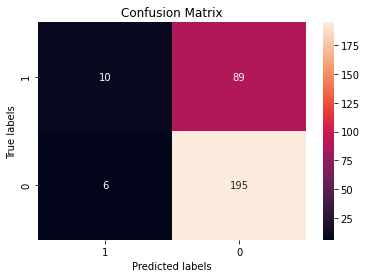

In [30]:
ax= plt.subplot()
sns.heatmap(svm_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


In [31]:
#pour le svm
compare_df_svm = pd.DataFrame({'actual': y_test, 'predicted': y_pred_svm})
compare_df_svm = compare_df_svm.reset_index(drop = True)
compare_df_svm

,actual,predicted
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
295,1.0,0.0
296,1.0,0.0
297,0.0,0.0
298,0.0,0.0


#### pour le knn:

In [32]:
e=1-knn.score(x_test,y_test)
e
y_pred_knn = knn.predict(x_test)


In [33]:
cm_knn= metrics.confusion_matrix(y_test,y_pred_knn)
print(cm_knn)

[[180  21]
 [ 46  53]]


In [34]:
#taux de succès
acc_knn = metrics.accuracy_score(y_test,y_pred_knn)
print(acc_knn)

0.7766666666666666


In [35]:
#taux d'erreur
err_knn = 1.0 - acc_knn
print(err_knn)

0.22333333333333338


In [36]:
metrics.accuracy_score(y_test,y_pred_knn)

0.7766666666666666

#### matrice de confusion:

In [37]:
#pour le knn
knn_conf=confusion_matrix(y_test, y_pred_knn, labels=[1, 0])
pd.DataFrame(knn_conf)


,0,1
0,53,46
1,21,180


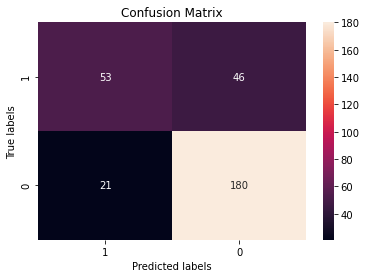

In [38]:
ax= plt.subplot()
sns.heatmap(knn_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


In [39]:
#pour le knn
compare_df_knn = pd.DataFrame({'actual': y_test, 'predicted': y_pred_knn})
compare_df_knn = compare_df_knn.reset_index(drop = True)
compare_df_knn

,actual,predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
295,1.0,1.0
296,1.0,1.0
297,0.0,0.0
298,0.0,0.0


#### pour le DTC

In [40]:
#Predict the response for test dataset
y_pred_DTC = DTC.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DTC)*100)

NameError: name 'DTC' is not defined

In [83]:
metrics.accuracy_score(y_test,y_pred_DTC)

0.7266666666666667

In [84]:
#Evaluation using Confusion matrix
confusion_matrix(y_test,y_pred_DTC)

array([[194,   7],
       [ 75,  24]], dtype=int64)

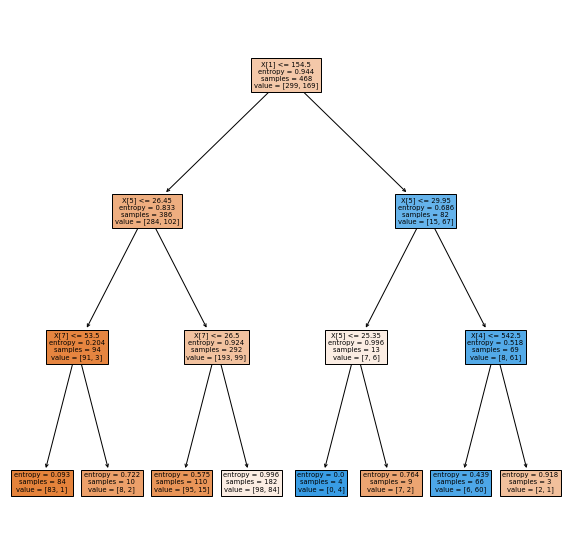

In [85]:
_, ax = plt.subplots(figsize=(10,10)) # Resize figure
plot_tree(DTC, filled=True, ax=ax)
plt.show()

In [86]:
#pour le knn
DTC_conf=confusion_matrix(y_test, y_pred_DTC, labels=[1, 0])
pd.DataFrame(DTC_conf)


,0,1
0,24,75
1,7,194


In [87]:
#Evaluation using Classification report
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83       201
         1.0       0.77      0.24      0.37        99

    accuracy                           0.73       300
   macro avg       0.75      0.60      0.60       300
weighted avg       0.74      0.73      0.67       300



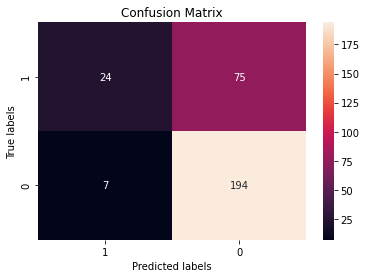

In [88]:
ax= plt.subplot()
sns.heatmap(DTC_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


In [89]:
#pour DTC
compare_df_DTC = pd.DataFrame({'actual': y_test, 'predicted': y_pred_DTC})
compare_df_DTC = compare_df_DTC.reset_index(drop = True)
compare_df_DTC

,actual,predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
295,1.0,1.0
296,1.0,1.0
297,0.0,0.0
298,0.0,0.0


### pour le RFC:

In [90]:
y_pred_RFC = rfc.predict(x_test)

In [91]:
from sklearn import metrics

print("Accuracy_Score = ",format(metrics.accuracy_score(y_test,y_pred_RFC)))

Accuracy_Score =  0.77


In [92]:
#Evaluation using Confusion matrix
confusion_matrix(y_test,y_pred_RFC)

array([[179,  22],
       [ 47,  52]], dtype=int64)

In [93]:
RFC_conf=confusion_matrix(y_test, y_pred_RFC, labels=[1, 0])
pd.DataFrame(RFC_conf)

,0,1
0,52,47
1,22,179


In [94]:
#Evaluation using Classification report
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       201
         1.0       0.70      0.53      0.60        99

    accuracy                           0.77       300
   macro avg       0.75      0.71      0.72       300
weighted avg       0.76      0.77      0.76       300



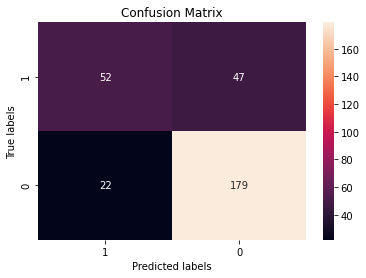

In [95]:
ax= plt.subplot()
sns.heatmap(RFC_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


In [96]:
#pour RFC
compare_df_RFC = pd.DataFrame({'actual': y_test, 'predicted': y_pred_RFC})
compare_df_RFC = compare_df_RFC.reset_index(drop = True)
compare_df_RFC

,actual,predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
295,1.0,1.0
296,1.0,1.0
297,0.0,0.0
298,0.0,0.0


## Roc curve

In [ ]:
#Logistic Regression ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#test_scores = lr.predict_proba(x_test)
#fpr, tpr, threshold = roc_curve(y_test, test_scores[:,1])
#roc_auc = auc(fpr, tpr)

test_scores_knn = knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold_knn= roc_curve(y_test, test_scores_knn[:, 1])
roc_auc_knn =  metrics.auc(fpr_knn, tpr_knn)

test_scores_svm = svm_model.predict_proba(x_test)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, test_scores_svm[:, 1])
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

#test_scores_DTC = DTC.predict_proba(x_test)
#fpr_DTC, tpr_DTC, threshold_DTC = roc_curve(y_test, test_scores_DTC[:, 1])
#roc_auc_DTC = metrics.auc(fpr_DTC, tpr_DTC)

#test_scores_RF = rf_model.predict_proba(x_test)
#fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test, test_scores_RF[:,1])
#roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'r', label = 'RL = %0.2f' % roc_auc)
plt.plot(fpr_knn, tpr_knn, 'g', label = 'KNN ' )
plt.plot(fpr_svm, tpr_svm, 'b', label = 'SVM ' % )
#plt.plot(fpr_DTC, tpr_DTC, 'black', label = 'DTC = %0.2f' % roc_auc_DTC)
#plt.plot(fpr_RF, tpr_RF, 'orange', label = 'RF = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

## la courbe de gain:

#### pour le knn:

In [98]:
#calcul des probas d'affectation sur ech. test
score_knn = test_scores_knn[:,1]
pos_knn = pd.get_dummies(y_test).values
pos_knn = pos_knn[:,1]
npos_knn = np.sum(pos_knn)
#index pour tri selon le score croissant
index_knn = np.argsort(score_knn) 
#inverser pour score décroissant – on s’intéresse à forte proba. en priorité
index_knn = index_knn[::-1] # [ 159 255 11 … 261 265 45 55 ]
#tri des individus (des valeurs 0/1)
sort_pos_knn = pos_knn[index_knn] # [ 1 1 1 1 1 0 1 1 …]
#somme cumulée
cpos_knn = np.cumsum(sort_pos_knn) # [ 1 2 3 4 5 5 6 7 … 99]
#rappel
rappel_knn = cpos_knn/npos_knn # [ 1/99 2/99 3/99 4/99 5/99 5/99 6/99 7/99 … 99/99]
#nb. obs ech.test
n_knn = y_test.shape[0] # 300, il y a 300 ind. dans l’éch. test
#taille de cible – séquence de valeurs de 1 à 300 avec un pas de 1
taille_knn = np.arange(start=1,stop=301,step=1) # [1 2 3 4 5 … 300]
#passer en proportion
taille_knn = taille_knn / n_knn

#### logistque regression:

In [99]:
#calcul des probas d'affectation sur ech. test
score = probas[:,1]
import pandas as pd
pos = pd.get_dummies(y_test).values
pos = pos[:,1]
import numpy
npos = numpy.sum(pos)
#index pour tri selon le score croissant
index = numpy.argsort(score) 
#inverser pour score décroissant – on s’intéresse à forte proba. en priorité
index = index[::-1] 
#tri des individus (des valeurs 0/1)
sort_pos = pos[index] 
#somme cumulée
cpos = numpy.cumsum(sort_pos) 
#rappel
rappel = cpos/npos
#nb. obs ech.test
n = y_test.shape[0] # 300, il y a 300 ind. dans l’éch. test
#taille de cible – séquence de valeurs de 1 à 300 avec un pas de 1
taille = numpy.arange(start=1,stop=301,step=1) # [1 2 3 4 5 … 300]
#passer en proportion
taille = taille / n

### pour svm

In [100]:
#calcul des probas d'affectation sur ech. test
score_svm = test_scores_svm[:,1]
pos_svm = pd.get_dummies(y_test).values
pos_svm = pos_svm[:,1]
npos_svm = numpy.sum(pos)
#index pour tri selon le score croissant
index_svm = numpy.argsort(score_svm) 
#inverser pour score décroissant – on s’intéresse à forte proba. en priorité
index_svm = index_svm[::-1] 
#tri des individus (des valeurs 0/1)
sort_pos_svm = pos_svm[index_svm] 
#somme cumulée
cpos_svm = numpy.cumsum(sort_pos_svm) 
#rappel
rappel_svm = cpos_svm/npos_svm 
#nb. obs ech.test
n_svm = y_test.shape[0] # 300, il y a 300 ind. dans l’éch. test
#taille de cible – séquence de valeurs de 1 à 300 avec un pas de 1
taille_svm = numpy.arange(start=1,stop=301,step=1) 
#passer en proportion
taille_svm = taille_svm / n_svm

### pour DTC

In [101]:
#calcul des probas d'affectation sur ech. test
score_DTC = test_scores_DTC[:,1]
pos_DTC = pd.get_dummies(y_test).values
pos_DTC = pos_DTC[:,1]
npos_DTC = numpy.sum(pos)
#index pour tri selon le score croissant
index_DTC = numpy.argsort(score_DTC) 
#inverser pour score décroissant – on s’intéresse à forte proba. en priorité
index_DTC = index_DTC[::-1] 
#tri des individus (des valeurs 0/1)
sort_pos_DTC= pos_DTC[index_DTC] 
#somme cumulée
cpos_DTC = numpy.cumsum(sort_pos_DTC) 
#rappel
rappel_DTC = cpos_DTC/npos_DTC
#nb. obs ech.test
n_DTC = y_test.shape[0] # 300, il y a 300 ind. dans l’éch. test
#taille de cible – séquence de valeurs de 1 à 300 avec un pas de 1
taille_DTC = numpy.arange(start=1,stop=301,step=1) 
#passer en proportion
taille_DTC = taille_DTC / n_DTC

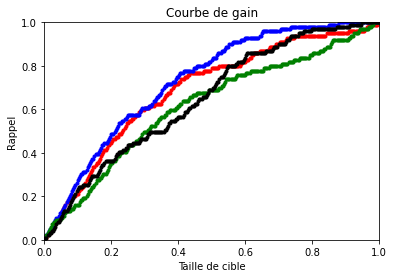

In [102]:
#graphique avec matplotlib
import matplotlib.pyplot as plt
#titre et en-têtes
plt.title('Courbe de gain')
plt.xlabel('Taille de cible')
plt.ylabel('Rappel')
#limites en abscisse et ordonnée
plt.xlim(0,1)
plt.ylim(0,1)


#insertion du couple (taille, rappel)
plt.scatter(taille_knn,rappel_knn,marker='.',color='red')
plt.scatter(taille,rappel,marker='.',color='blue')
plt.scatter(taille_svm,rappel_svm,marker='.',color='green')
plt.scatter(taille_DTC,rappel_DTC,marker='.',color='black')
#affichage
plt.show()


# Partie 2:Deep Learning

La précision des perceptrons  n’est pas du tout aussi bonne que les autres modèles, cela est probablement dû à la mise à l’échelle des données. Les algorithmes d’apprentissage profond s’attendent également à ce que toutes les fonctionnalités d’entrée varient de la même manière et, idéalement, à avoir une moyenne de 0 et une variance de 1.

Afin d'eviter le test aleatoire,j'ai fait une boucle me specifiant le nombre exacte de perceptrons que je dois utiliser pour avoir un bon modele

In [81]:

from keras.utils import np_utils

#Defining and desining neural network model
for i in range(1,80):
    model = Sequential()
    model.add(Dense(i, input_dim=8, activation='relu'))
    model.add(Dense(i, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    scores = model.evaluate(x_test,y_test)
    print("\n  %s: %.2f  %%" %  (model.metrics_names[1], scores[1]*100))
    print("i" , i)

10/10 [==============================] - 1s 4ms/step - loss: 33.3568 - accuracy: 0.3467

  accuracy: 34.67  %
i 1
10/10 [==============================] - 0s 2ms/step - loss: 28.7565 - accuracy: 0.6700

  accuracy: 67.00  %
i 2
10/10 [==============================] - 0s 2ms/step - loss: 31.3814 - accuracy: 0.3300

  accuracy: 33.00  %
i 3
10/10 [==============================] - 0s 1ms/step - loss: 14.4624 - accuracy: 0.3367

  accuracy: 33.67  %
i 4
10/10 [==============================] - 0s 1ms/step - loss: 3.5443 - accuracy: 0.5967

  accuracy: 59.67  %
i 5
10/10 [==============================] - 0s 1ms/step - loss: 64.4537 - accuracy: 0.3300

  accuracy: 33.00  %
i 6
10/10 [==============================] - 0s 1ms/step - loss: 38.5165 - accuracy: 0.3300

  accuracy: 33.00  %
i 7
10/10 [==============================] - 1s 4ms/step - loss: 9.9347 - accuracy: 0.6600

  accuracy: 66.00  %
i 8
10/10 [==============================] - 0s 2ms/step - loss: 2.2317 - accuracy: 0.6233

  

Il faut choisir un nombre tel que l'accuracy correspondante doit etre maximale et constante au cours du temps

In [103]:
#one hot encoding
from keras.utils import np_utils

#Defining and desining neural network model
model = Sequential()
model.add(Dense(9, input_dim=8, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

    

In [104]:
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# training model
model.fit(x_train, y_train, epochs=150, batch_size=10)# training model

Epoch 1/150
47/47 [==============================] - 2s 5ms/step - loss: 12.8022 - accuracy: 0.6389
Epoch 2/150
47/47 [==============================] - 0s 4ms/step - loss: 2.3214 - accuracy: 0.5342
Epoch 3/150
47/47 [==============================] - 0s 4ms/step - loss: 1.2908 - accuracy: 0.5321
Epoch 4/150
47/47 [==============================] - 0s 4ms/step - loss: 1.0698 - accuracy: 0.5833
Epoch 5/150
47/47 [==============================] - 0s 5ms/step - loss: 0.9001 - accuracy: 0.6261
Epoch 6/150
47/47 [==============================] - 0s 4ms/step - loss: 0.8083 - accuracy: 0.6068
Epoch 7/150
47/47 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.6132
Epoch 8/150
47/47 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.6474
Epoch 9/150
47/47 [==============================] - 0s 5ms/step - loss: 0.7002 - accuracy: 0.6453
Epoch 10/150
47/47 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.6453
Epoch 11

In [106]:
#prediction and evalution
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.67

In [107]:
scores = model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


10/10 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7333

accuracy: 73.33%


l'accuracy et loss varient biensure entre les tests

## Machine learning VS Deep learning

## Courbe de Roc

In [108]:
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
test_scores = lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, test_scores[:,1])
roc_auc = auc(fpr, tpr)



In [109]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

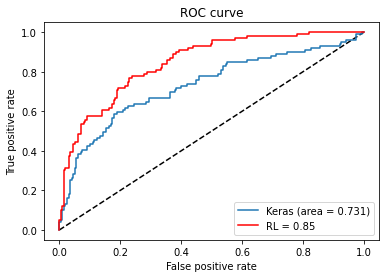

In [110]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr, tpr, 'r', label = 'RL = %0.2f' % roc_auc)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

On peut donc remarquer que les deux modeles sont tres proches , mais la Regression logistque reste le meilleur modele pour ce genre de traitement.

In [111]:
scores = model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


10/10 [==============================] - 0s 6ms/step - loss: 0.5823 - accuracy: 0.7333

accuracy: 73.33%


# Partie 3: Interface graphique Qt5

Dans ce cas, je vais implementer les deux modeles precedents (modele du machine learning et celui du deep learning).Pour cela , je dois les enregistrer dans des fichiers pour pouvoir les entrainer et les utiliser dans la partie graphique

#### pour le modele du machine learning:

In [127]:
import pickle

In [128]:
with open(r'C:\Users\user\Downloads\ProjetAI\model','wb') as fich:
    pickle.dump(rf_model, fich)

In [129]:
pickled_model = pickle.load(open(r'C:\Users\user\Downloads\ProjetAI\model', 'rb'))


#### pour le modele du deep learning:

In [130]:
model.save(r'C:\Users\user\Downloads\ProjetAI\savedModel.h5')

In [131]:
new_model=keras.models.load_model(r'C:\Users\user\Downloads\ProjetAI\savedModel.h5')

In [132]:
new_model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_246 (Dense)           (None, 9)                 81        
                                                                 
 dense_247 (Dense)           (None, 9)                 90        
                                                                 
 dense_248 (Dense)           (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Vous pouvez voir les paramètres utilisés dans mon modèle, il y a un total de 181 paramètres entraînables

In [133]:
acc_nm = new_model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (new_model.metrics_names[1], scores[1]*100))


10/10 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7333

accuracy: 73.33%


#### Le test va etre execute dans les fichiers.ipynb associés